# Neural Networks Project - Credit Risks Analysis

An experimental study about a neural network model aplication in a real world problem.

Neural Networks - Minister by Germano Vasconcelos

Team:  
- Lucas Alves Rufno  
- Rodrigo de Lima Oliveira  
- Ullayne Fernandes Farias de Lima  

### Imports:

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Read and view dataset:
Read file as .csv in Pandas with 'tab' as separator and describe data partially.

In [2]:
ds = pd.read_csv("datasets/original/TRN", sep='\t')
ds.describe()

,INDEX,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
count,389196.00000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,3.891960e+05,389196.000000,...,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000
mean,194597.50000,0.889274,0.691952,0.476552,0.296195,0.241179,0.218011,0.186836,4.552049e-01,0.521514,...,0.423378,0.417540,0.425708,0.459820,0.440842,0.436896,0.433709,0.440339,0.655449,0.344551
std,112351.35202,0.313793,0.461687,0.499451,0.456579,0.427799,0.412895,0.389781,2.537459e-01,0.499538,...,0.494095,0.493154,0.494451,0.498384,0.496489,0.496002,0.495587,0.496428,0.475222,0.475222
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.506237e-16,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,97298.75000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.507866e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,194597.50000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.375241e-01,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,291896.25000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.578835e-01,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,389195.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Clean dataset:
Removing the column "INDEX" and "IND_BOM_1_2", they are irrelevant to solve problem

In [20]:
ds.drop(['INDEX', 'IND_BOM_1_2'], axis=1,inplace=True)
ds[:5]

,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,...,CEP4_6,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1
0,1,1,1,0,0,0,0,0.135098,1,0.222222,...,0,0,0,1,1,0,1,1,1,0
1,1,0,1,0,0,1,0,0.273504,1,0.111111,...,0,0,1,0,1,1,0,0,0,1
2,1,0,1,0,0,1,0,0.281910,0,1.000000,...,0,1,1,0,0,0,0,1,0,1
3,1,1,1,0,0,0,0,0.225741,0,0.111111,...,0,1,1,0,1,1,0,1,0,1
4,1,1,0,0,0,1,0,0.480403,0,0.111111,...,1,1,1,1,0,0,1,0,1,1


### Stratify dataset:
Separate dataset according to classes in "IND_BOM_1_1".

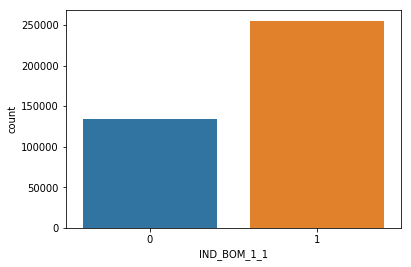

In [21]:
ds0 = ds[ds['IND_BOM_1_1'] <  0.5]
ds1 = ds[ds['IND_BOM_1_1'] >= 0.5]

sns.countplot('IND_BOM_1_1', data=ds)

### Segment dataset

Separate the stratified dataset in three sets:
- Train: 50%
- Validation: 25%
- Test: 25%